In [1]:
from Model import Levels, ElectronsTransitionsData, AtomsTransitionsData, PickAndSolve, UFloat, utilities
import numpy as np

from PlotUtils import errsPlot as plt, splt

In [2]:
mean = utilities.mean

In [3]:
n_g = 2.687e25
T_g = 300

In [4]:
# Simulate with T_e = 3 and f_e = 10^-5
T_e_real = 2
f_e_real = 10**-5

ns = np.array( [ PickAndSolve.PickAndSolve().getEquilibrium(  n_g = n_g, f_e = f_e_real, T_e = T_e_real, T_g = T_g ) for i in range(50) ] )
n = np.array( [ utilities.mean( ns[:,i] ) for i in range( ns.shape[1] ) ] )
levels_tofit = Levels.Levels().namesToIdxs(['2p1','2p2','2p3','2p4','2p5','2p6','2p7','2p8','2p9','2p10'])
n_real = n[levels_tofit]

Initializing class Levels


Loaded 121 files
Loaded 82 rows


Text(0.5, 1.0, 'Simulated spectra to be fitted')

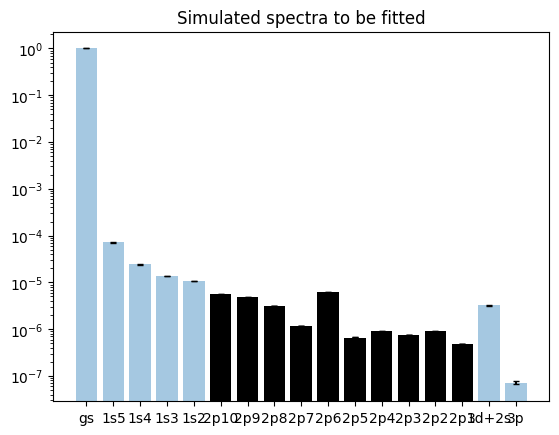

In [5]:
plt.figure()

plt.bar( Levels.Levels().all_names(), n, alpha = 0.4 )
plt.bar( levels_tofit, n_real, keep_color=True )
plt.yscale('log')

plt.title("Simulated spectra to be fitted")

In [6]:
for tol_exp in [14]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolveUsingCG(
        n_real, levels_tofit,
        howManyPicks=10,
        tol = 10**(-tol_exp)
    )

    for mg, te in zip( milogf_es, T_es ):
        print( mg, te )

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( [10**mean( -milogf_es ).n], [mean( T_es ).n], 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    # splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChi")

 10%|█         | 1/10 [02:26<21:58, 146.49s/it]


KeyboardInterrupt: 

100%|██████████| 100/100 [33:35<00:00, 20.15s/it]


1.0702126095117945 0.2000004433424571
1.0835299789210735 0.20000045781963657
1.0625075543419178 0.20000065014573187
1.0910352185393348 0.20000073044315853
1.07510575573661 0.2000007330317087
1.0924283037912006 0.20002346218393602
1.1235782407506993 0.20000068199706073
1.073570593737671 0.20000059473905213
1.09355750302845 0.20000032376884205
1.0646006558497745 0.20004683727198283
1.1119287884357032 0.20000094725637327
1.1340123187575586 0.20005773229506496
1.0806389258305167 0.2000252793723343
1.1126669829679716 0.20000078681609804
1.1000689070115492 0.20005829816612272
1.0908526663981977 0.20000037857126768
1.1064552468779012 0.20000065589118715
1.0796174394151015 0.20000061965397914
1.0903689173857567 0.2000002979492887
1.1119342523045184 0.20005385593629926
1.1306431449602279 0.20002991446582208
1.0879619254404533 0.2000006291824025
1.0764618823434224 0.20000076605656972
1.131348821557105 0.2000005758885423
1.1000981195521262 0.20001766668643065
1.1379138021311301 0.2000005973264400

TypeError: len() of unsized object

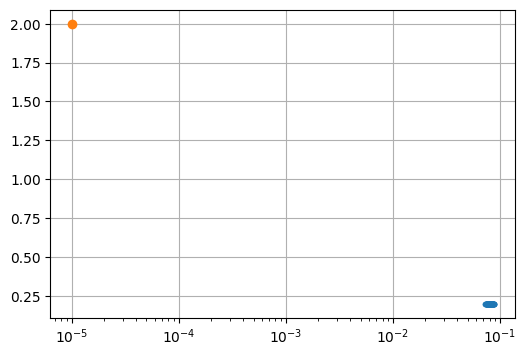

In [ ]:
for tol_exp in [8,9,10,11,12,13,14,15,16]:

    # Now try to estimate f_e and T_e
    milogf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolveUsingCG(
        n_real, levels_tofit,
        howManyPicks=100,
        # T_e_guess=T_e_real, minus_log_f_e_guess=-np.log10(f_e_real),
        tol = 10**(-tol_exp)
    )

    for mg, te in zip( milogf_es, T_es ):
        print( mg, te )

        

    splt.init()
    plt.semilogx( np.power( 10, -milogf_es), T_es, '.', label = 'Fits results' )
    plt.plot( f_e_real, T_e_real, 'o', label = "Real value" )
    plt.plot( 10**mean( -milogf_es ).n, mean( T_es ).n, 'o', label = "Average of fit results" )
    plt.xlabel(f"$f_e$")
    plt.xlim( 10**-10, 1 )
    plt.ylabel(f"$T_e$ [K]")
    plt.ylim( 0, 5 )
    plt.legend()

    print( mean( milogf_es ), mean( T_es ) )
    print( -np.log10(f_e_real), T_e_real )

    splt.export(f"A01_UsingChiSquared_100picks_1e{tol_exp}tol_noGuess_withLogChiAndCHmethod")

In [ ]:
# minf_es, T_es = PickAndSolve.PickAndSolve.manyPicksAndSolve(
#     [ ufloat( 4, 0.2 ), ufloat( 4.5, 0.2 ), ufloat( 8, 0.2 ), ufloat( 2.2, 0.2 )],
#     Levels.Levels().namesToIdxs(['2p9', '2p8', '2p6', '2p4']),
#     howManyPicks=25
# )

  0%|          | 0/25 [00:00<?, ?it/s]

Loaded 121 files
Loaded 82 rows
Initializing class RadiativeTransitions


100%|██████████| 25/25 [06:50<00:00, 16.40s/it]


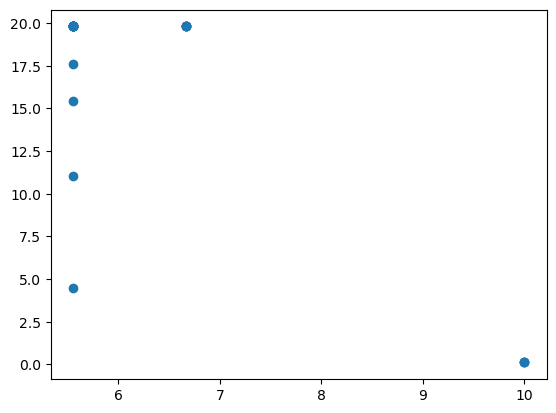

In [ ]:
plt.plot( minus_log_f_es / np.log(10), T_es, 'o' )

In [ ]:
f_es = np.logspace( -10, 0, 50 )
T_es = np.linspace( 0.11, 19.8, 50 )

measured_levels = [ ufloat( 4, 0.2 ), ufloat( 4.5, 0.2 ), ufloat( 8, 0.2 ), ufloat( 2.2, 0.2 )]
measured_levels_idxs = Levels.Levels().namesToIdxs(['2p9', '2p8', '2p6', '2p4'])
#     howManyPicks=25
n_g = 2.687e+29
T_g = 300


data = np.zeros( (len( f_es ), len( T_es )) )
for i_f, f in tqdm( enumerate( f_es ), total=len( f_es ) ):
    for i_t, t in enumerate( T_es ):
        data[ i_f, i_t ] = pas.chiSquared( 
            measured_levels, pas.getEquilibrium( n_g, f, t, T_g )[measured_levels_idxs] )


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
print( f_es[ np.unravel_index( np.argmin( data ), data.shape )[0] ], T_es[ np.unravel_index( np.argmin( data ), data.shape )[1] ] )
print( data[ np.unravel_index( np.argmin( data ), data.shape ) ])

3.088843596477485e-06 9.352244897959185
54.47599040542863


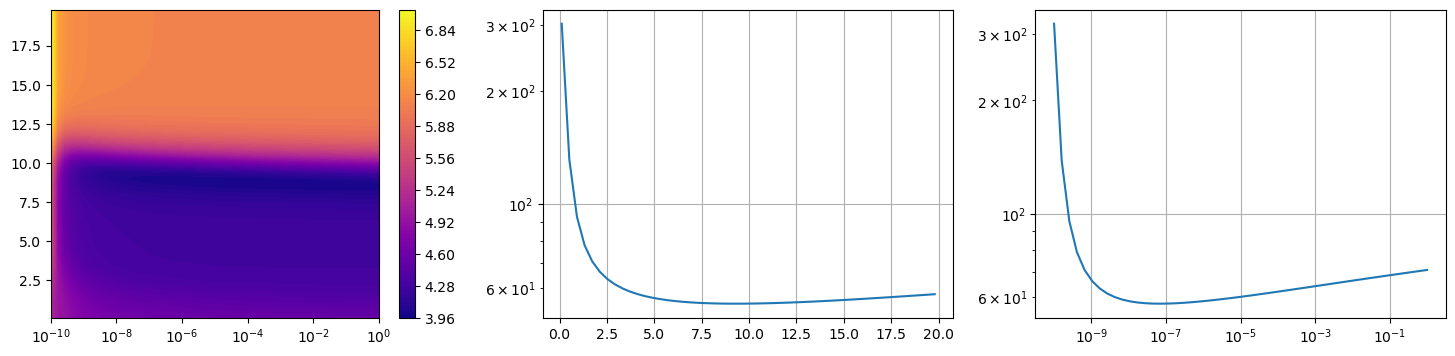

In [ ]:
splt.init_bytot( 3 )
splt.next()

plt.contourf( f_es, T_es, np.log( data ), cmap = 'plasma', levels = 100 )
plt.xscale('log')
plt.colorbar()

splt.next()
plt.semilogy( T_es, data[np.unravel_index( np.argmin( data ), data.shape )[0],:] )
splt.next()
plt.loglog( f_es, data[np.unravel_index( np.argmin( data ), data.shape )[1],:] )

In [ ]:
from scipy.optimize import minimize
from plots import splt

In [ ]:
minimize(
    lambda x: pas.chiSquared( measured_levels, pas.getEquilibrium( n_g, 10**( -x[0] ), x[1], T_g )[measured_levels_idxs] ),
    [ -5, 2 ],
        bounds=[
        (1, 15),
        (0.11, 19.8)
        ],
        callback= lambda intermediate_result : print( intermediate_result.x, intermediate_result.fun ),
        tol = 1e-8
        ).x

[ 1.54428142 18.87190558] 447.7877651136975
[ 4.54460193 19.8       ] 246.4602349405925
[ 9.78081156 18.50237998] 89.0129780199223
[ 8.10644054 19.51341804] 71.92388244087789
[ 8.05882914 19.52419416] 71.89742382368635
[ 7.19101764 19.8       ] 70.85032570501699
[ 5.66324743 19.8       ] 54.9989430288059
[ 5.71519288 19.79676858] 54.96175084268368
[ 5.69465397 19.69591813] 54.92585354983981
[ 5.68744518 19.54526337] 54.91287685089486
[ 5.66108671 18.61096905] 54.851573555256614
[ 5.61072458 16.08278596] 54.70517505470838
[ 5.53967334 11.7319719 ] 54.48747831653253
[ 5.52743095 10.5045056 ] 54.434241309607245
[ 5.55648149 10.71913188] 54.3387110398303
[ 5.57503009 11.07205867] 54.32457409384308
[ 5.5757943  11.05272703] 54.32448306505286
[ 5.57550736 11.02840818] 54.324469724342265
[ 5.57536167 11.01863219] 54.3244645395329
[ 5.5751083  11.00343754] 54.32445629988847
[ 5.57504515 11.00011014] 54.32445441379235
[ 5.5750432  11.00000539] 54.32445435531755


array([ 5.5750432 , 11.00000539])